# Problem Set 9
## Fundamentals of Simulation Methods, WiSe 20/21
#### Author: Elias Olofsson
#### Date: 2021-01-27

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

## 1. Numerical Hydrodynamics - Part 1 
### 1.1. Advection in 1D (12 pts)

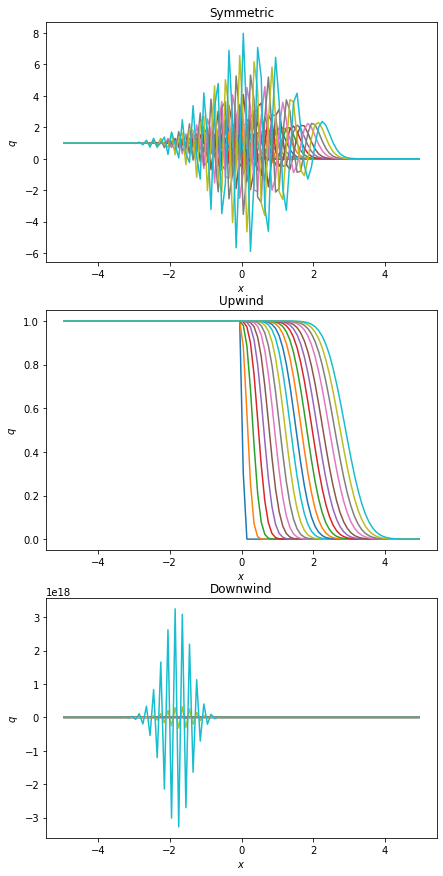

In [2]:
# Parameters
N         = 100  # Number of cells.
L         = 10   # Length of 1D domain.
v         = 1    # Advection parameter.
T         = 3    # Integration time.
N_steps   = 100  # Number of timesteps.
plot_freq = 5    # Plot every n:th iteration.

# Initial conditions. 
threshold    = 0
q_init_left  = 1   # q(x,0) = q_init_left  for x < threshold
q_init_right = 0   # q(x,0) = q_init_right for x >= threshold

# Dirichlet boundary conditions at x = ±L/2.
q_left  = 1 
q_right = 0 

# Numerical methods to use.
methods = ['Symmetric', 'Upwind', 'Downwind']

# -----------------------------------------------
# Timestep size and cell size. 
dt = T/N_steps 
dx = L/N

# Position vector (Excluding ghost cells).
x = np.linspace(-(L-dx)/2, (L-dx)/2, N) 

# Create subplot.
fig, ax = plt.subplots(len(methods), 1, figsize=(7,5*len(methods)))

# For each of the methods.
for i, method in enumerate(methods):
    
    # Pre-allocate q (Including ghost cells).
    q = np.zeros(N+2)

    # Assign inital conditions.
    q[1:-1][x < threshold]  = q_init_left
    q[1:-1][x >= threshold] = q_init_right

    # Apply boundary conditions. 
    q[0]  = 2*q_left  - q[1]
    q[-1] = 2*q_right - q[-2]

    # Main simulation loop.
    t = 0
    while t < T: 
        # Step in time.
        if method == 'Symmetric':
            q[1:-1] = q[1:-1] - v*dt/dx*(q[2:] - q[:-2])/2
        elif method == 'Upwind':
            q[1:-1] = q[1:-1] - v*dt/dx*(q[1:-1] - q[:-2])    
        elif method == 'Downwind':
            q[1:-1] = q[1:-1] - v*dt/dx*(q[2:] - q[1:-1])

        # Apply boundary conditions.
        q[0]  = 2*q_left  - q[1]
        q[-1] = 2*q_right - q[-2]

        # Plot results.
        if int(t/dt) % plot_freq == 0:
            ax[i].plot(x,q[1:-1])

        # Update time.
        t += dt
    
    # Plot settings.
    ax[i].set_title(method)
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$q$')
     
plt.show()

As we can see in the figure above, the only stable method is the *upwind* scheme, where only information in the negative direction in $x$ is used in the integration. Both the *symmetric* and the *downwind* schemes are very unstable, and yield solutions that oscillate wildly. 

One should note however that the differentiation between the upwind and downwind schemes are determined by the sign of the constant parameter $v$, i.e. the direction of transport of the quantity $q$. Thus, if the sign of $v$ were switched, the numerical schemes above corresponding up *upwind* and *downwind*, have to be interchanged.

We investigate this further, from now on only using the **upwind** scheme.

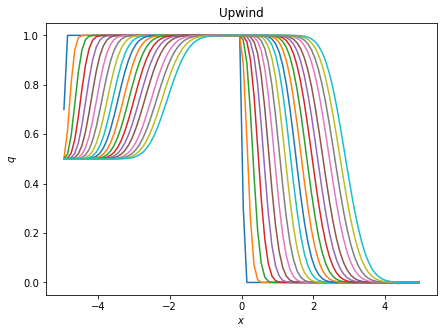

In [3]:
# Parameters
N         = 100  # Number of cells.
L         = 10   # Length of 1D domain.
v         = 1    # Advection parameter.
T         = 3    # Integration time.
N_steps   = 100  # Number of timesteps.
plot_freq = 5    # Plot every n:th iteration.

# Initial conditions. 
threshold    = 0
q_init_left  = 1   # q(x,0) = q_init_left  for x < threshold
q_init_right = 0   # q(x,0) = q_init_right for x >= threshold

# Dirichlet boundary conditions at x = ±L/2.
q_left  = 0.5 
q_right = 0 

# -----------------------------------------------
# Timestep size and cell size. 
dt = T/N_steps 
dx = L/N

# Position vector (Excluding ghost cells).
x = np.linspace(-(L-dx)/2, (L-dx)/2, N) 

# Create plot.
plt.figure(figsize=(7,5))

# Pre-allocate q (Including ghost cells).
q = np.zeros(N+2)

# Assign inital conditions.
q[1:-1][x < threshold]  = q_init_left
q[1:-1][x >= threshold] = q_init_right

# Apply boundary conditions. 
q[0]  = 2*q_left  - q[1]
q[-1] = 2*q_right - q[-2]

# Main simulation loop.
t = 0
while t < T: 
    # Step in time.
    q[1:-1] = q[1:-1] - v*dt/dx*(q[1:-1] - q[:-2])    
    
    # Apply boundary conditions.
    q[0]  = 2*q_left  - q[1]
    q[-1] = 2*q_right - q[-2]

    # Plot results.
    if int(t/dt) % plot_freq == 0:
        plt.plot(x,q[1:-1])

    # Update time.
    t += dt

    # Plot settings.
    plt.title('Upwind')
    plt.xlabel('$x$')
    plt.ylabel('$q$')
     
plt.show()

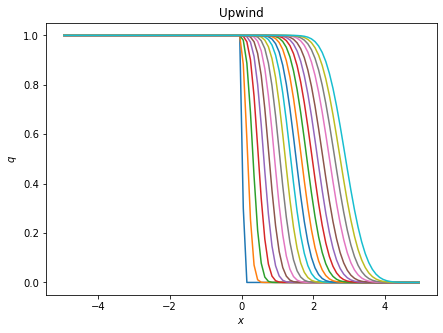

In [4]:
# Parameters
N         = 100  # Number of cells.
L         = 10   # Length of 1D domain.
v         = 1    # Advection parameter.
T         = 3    # Integration time.
N_steps   = 100  # Number of timesteps.
plot_freq = 5    # Plot every n:th iteration.

# Initial conditions. 
threshold    = 0
q_init_left  = 1   # q(x,0) = q_init_left  for x < threshold
q_init_right = 0   # q(x,0) = q_init_right for x >= threshold

# Dirichlet boundary conditions at x = ±L/2.
q_left  = 1 
q_right = 0.5

# -----------------------------------------------
# Timestep size and cell size. 
dt = T/N_steps 
dx = L/N

# Position vector (Excluding ghost cells).
x = np.linspace(-(L-dx)/2, (L-dx)/2, N) 

# Create plot.
plt.figure(figsize=(7,5))

# Pre-allocate q (Including ghost cells).
q = np.zeros(N+2)

# Assign inital conditions.
q[1:-1][x < threshold]  = q_init_left
q[1:-1][x >= threshold] = q_init_right

# Apply boundary conditions. 
q[0]  = 2*q_left  - q[1]
q[-1] = 2*q_right - q[-2]

# Main simulation loop.
t = 0
while t < T: 
    # Step in time.
    q[1:-1] = q[1:-1] - v*dt/dx*(q[1:-1] - q[:-2])    
    
    # Apply boundary conditions.
    q[0]  = 2*q_left  - q[1]
    q[-1] = 2*q_right - q[-2]

    # Plot results.
    if int(t/dt) % plot_freq == 0:
        plt.plot(x,q[1:-1])

    # Update time.
    t += dt

    # Plot settings.
    plt.title('Upwind')
    plt.xlabel('$x$')
    plt.ylabel('$q$')
     
plt.show()

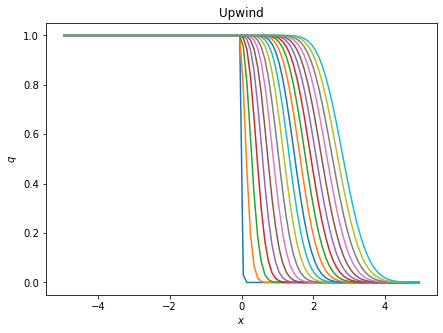

In [5]:
# Parameters
N         = 100  # Number of cells.
L         = 10   # Length of 1D domain.
v         = 1    # Advection parameter.
T         = 3    # Integration time.
N_steps   = 1000 # Number of timesteps.
plot_freq = 50   # Plot every n:th iteration.

# Initial conditions. 
threshold    = 0
q_init_left  = 1   # q(x,0) = q_init_left  for x < threshold
q_init_right = 0   # q(x,0) = q_init_right for x >= threshold

# Dirichlet boundary conditions at x = ±L/2.
q_left  = 1 
q_right = 0

# -----------------------------------------------
# Timestep size and cell size. 
dt = T/N_steps 
dx = L/N

# Position vector (Excluding ghost cells).
x = np.linspace(-(L-dx)/2, (L-dx)/2, N) 

# Create plot.
plt.figure(figsize=(7,5))

# Pre-allocate q (Including ghost cells).
q = np.zeros(N+2)

# Assign inital conditions.
q[1:-1][x < threshold]  = q_init_left
q[1:-1][x >= threshold] = q_init_right

# Apply boundary conditions. 
q[0]  = 2*q_left  - q[1]
q[-1] = 2*q_right - q[-2]

# Main simulation loop.
t = 0
while t < T: 
    # Step in time.
    q[1:-1] = q[1:-1] - v*dt/dx*(q[1:-1] - q[:-2])    
    
    # Apply boundary conditions.
    q[0]  = 2*q_left  - q[1]
    q[-1] = 2*q_right - q[-2]

    # Plot results.
    if int(t/dt) % plot_freq == 0:
        plt.plot(x,q[1:-1])

    # Update time.
    t += dt

    # Plot settings.
    plt.title('Upwind')
    plt.xlabel('$x$')
    plt.ylabel('$q$')
     
plt.show()

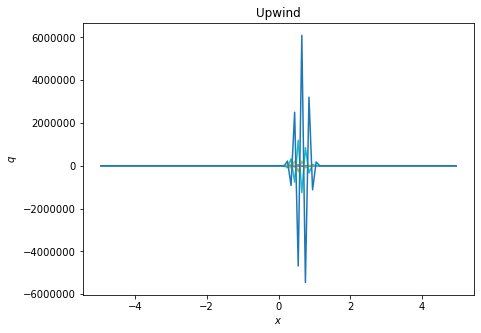

In [7]:
# Parameters
N         = 100  # Number of cells.
L         = 10   # Length of 1D domain.
v         = 1    # Advection parameter.
T         = 3    # Integration time.
N_steps   = 10   # Number of timesteps.
plot_freq = 1   # Plot every n:th iteration.

# Initial conditions. 
threshold    = 0
q_init_left  = 1   # q(x,0) = q_init_left  for x < threshold
q_init_right = 0   # q(x,0) = q_init_right for x >= threshold

# Dirichlet boundary conditions at x = ±L/2.
q_left  = 1 
q_right = 0

# -----------------------------------------------
# Timestep size and cell size. 
dt = T/N_steps 
dx = L/N

# Position vector (Excluding ghost cells).
x = np.linspace(-(L-dx)/2, (L-dx)/2, N) 

# Create plot.
plt.figure(figsize=(7,5))

# Pre-allocate q (Including ghost cells).
q = np.zeros(N+2)

# Assign inital conditions.
q[1:-1][x < threshold]  = q_init_left
q[1:-1][x >= threshold] = q_init_right

# Apply boundary conditions. 
q[0]  = 2*q_left  - q[1]
q[-1] = 2*q_right - q[-2]

# Main simulation loop.
t = 0
while t < T: 
    # Step in time.
    q[1:-1] = q[1:-1] - v*dt/dx*(q[1:-1] - q[:-2])    
    
    # Apply boundary conditions.
    q[0]  = 2*q_left  - q[1]
    q[-1] = 2*q_right - q[-2]

    # Plot results.
    if int(t/dt) % plot_freq == 0:
        plt.plot(x,q[1:-1])

    # Update time.
    t += dt

    # Plot settings.
    plt.title('Upwind')
    plt.xlabel('$x$')
    plt.ylabel('$q$')
     
plt.show()

## 1.2. General-purpose 1D advection subroutine (8 pts)